In [49]:
import pandas as pd

# All datasets that need to be reshaped
pivoted_dfs = []

def pivotBinaryData(file_path, column_name, new_name):
  # Load dataset
  df = pd.read_csv(file_path)

  # Filter only for high schools
  df = df[df['Sch_Div'].str.contains(" High ", case=False)]

  # Reshape data so each binary value is its own column
  pivot = df.pivot_table(
    index='Sch_Div',
    columns=column_name,
    values='Total Count',
    aggfunc='first'
  ).reset_index()

  # Rename columns
  no = new_name + "_No_Total_Count"
  yes = new_name + "_Yes_Total_Count"
  pivot.columns = ['Sch_Div', no, yes]

  pivoted_dfs.append(pivot)

  return pivot

# Reshape datasets that have separate rows for Yes and No pertaining to a specific feature
economically_disadvantaged = pivotBinaryData('ML4VA_Data/Economically_Disadvantaged.csv', 'Disadvantaged', 'Economically_Disadvantaged')
english_learners = pivotBinaryData('ML4VA_Data/English_Learners.csv', 'English Learners', 'English_Learners')
foster_care = pivotBinaryData('ML4VA_Data/Foster_Care.csv', 'Foster Care', 'Foster_Care')
homeless = pivotBinaryData('ML4VA_Data/Homeless.csv', 'Homeless', 'Homeless')
students_with_disabilities = pivotBinaryData('ML4VA_Data/Students_with_Disabilities.csv', 'Disabled', 'Disabled')

In [50]:
def pivotGender(file_path):
  # Load dataset
  df = pd.read_csv(file_path)

  # Filter only for high schools
  df = df[df['Sch_Div'].str.contains(" High ", case=False)]

  pivot = df.pivot_table(
    index='Sch_Div',
    columns='Gender',
    values='Total Count',
    aggfunc='first'
  ).reset_index()

  # Rename columns
  pivot.columns = ['Sch_Div', 'Gender_Female_Total_Count', 'Gender_Male_Total_Count', 'Gender_Other_Total_Count']

  # For schools that do not have an Other category, set Other value to 0
  pivot['Gender_Other_Total_Count'] = pivot['Gender_Other_Total_Count'].fillna(0)

  pivoted_dfs.append(pivot)

  return pivot

gender = pivotGender('ML4VA_Data/Gender.csv')

In [51]:
def pivotRace(file_path):
  df = pd.read_csv(file_path)

  df = df[df['Sch_Div'].str.contains(" High ", case=False)]

  original_column_names = [
    "Black, not of Hispanic origin",
    "White, not of Hispanic origin",
    "Hispanic",
    "Non-Hispanic, two or more races",
    "Asian",
    "American Indian or Alaska Native",
    "Native Hawaiian or Pacific Islander"
  ]

  new_column_names = [
    'Race_Black_Not_Of_Hispanic_Origin_Percentage',
    'Race_White_Not_Of_Hispanic_Origin_Percentage',
    'Race_Hispanic_Percentage',
    'Race_Non_Hispanic_Two_Or_More_Races_Percentage',
    'Race_Asian_Percentage',
    'Race_American_Indian_Or_Alaska_Native_Percentage',
    'Race_Native_Hawaiian_Or_Pacific_Islander_Percentage'
  ]

  pivot = df.pivot_table(
    index='Sch_Div',
    columns='Race',
    values='Percentage',
    aggfunc='first'
  ).reset_index()

  pivot.columns.name = None
  pivot.columns = ['Sch_Div'] + list(pivot.columns[1:])

  # Rename columns to follow format of new_column_names
  rename_mapping = dict(zip(original_column_names, new_column_names))
  pivot.rename(columns=rename_mapping, inplace=True)

  # Fill any missing values with 0
  pivot.fillna(0, inplace=True)

  pivoted_dfs.append(pivot)

  return pivot

race = pivotRace('ML4VA_Data/Race.csv')

In [52]:
def pivotTeacherEducationLevel(file_path):
  df = pd.read_csv(file_path)

  df = df[df['Sch_Div'].str.contains(" High ", case=False)]

  original_column_names = [
    "Bachelor's Degree",
    "Master's Degree",
    "Doctoral Degree"
  ]

  new_column_names = [
    "Teachers_Bachelors_Degree_Percentage",
    "Teachers_Masters_Degree_Percentage",
    "Teachers_Doctoral_Degree_Percentage"
  ]

  pivot = df.pivot_table(
    index='Sch_Div',
    columns='Degree_Type',
    values='Degree_Percent',
    aggfunc='first'
  ).reset_index()

  pivot.columns.name = None
  pivot.columns = ['Sch_Div'] + list(pivot.columns[1:])

  rename_mapping = dict(zip(original_column_names, new_column_names))
  pivot.rename(columns=rename_mapping, inplace=True)

  pivoted_dfs.append(pivot)

  return pivot

teachers_education_level = pivotTeacherEducationLevel('ML4VA_Data/Education_Level.csv')

In [53]:
#Predicting Standardized Scores with Random Forest

def solPassRateCleanup(file_path):
  df = pd.read_csv(file_path)
  df = df.drop(columns=['School', 'Division','Sch_Type'])

  df = df[df['Sch_Div'].str.contains(" High ", case=False)]

  return df


In [54]:
# Load in other datasets that did not need to be reshaped
other_files = ['Free_and_Reduced_Lunch.csv', 'Funding.csv', 'Absenteeism.csv', 'Experience.csv', 'Graduation.csv']
file_names = ['ML4VA_Data/' + file_name for file_name in other_files]

# Filter other datasets for only high schools
other_dfs = [pd.read_csv(file_name) for file_name in file_names]
for i, df in enumerate(other_dfs):
  other_dfs[i] = df[df['Sch_Div'].str.contains(" High ", case=False)]

# Combine reshaped datasets with other datasets
all_dfs = pivoted_dfs + other_dfs

# Merge datasets based on School Division (Sch_Div), discard any high schools that are not present in all datasets
merged_df = all_dfs[0]
for i in range(1, len(all_dfs)):
  merged_df = pd.merge(merged_df, all_dfs[i], on='Sch_Div', how='inner')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 36 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Sch_Div                                                      285 non-null    object 
 1   Economically_Disadvantaged_No_Total_Count                    282 non-null    object 
 2   Economically_Disadvantaged_Yes_Total_Count                   285 non-null    object 
 3   English_Learners_No_Total_Count                              285 non-null    object 
 4   English_Learners_Yes_Total_Count                             186 non-null    object 
 5   Foster_Care_No_Total_Count                                   285 non-null    object 
 6   Foster_Care_Yes_Total_Count                                  226 non-null    object 
 7   Homeless_No_Total_Count                                      285 non-null    obj

In [55]:
# Drop features that have complements and/or a low number of non-null entries
merged_df = merged_df.drop(columns=["Homeless_Yes_Total_Count", "English_Learners_Yes_Total_Count", "Foster_Care_Yes_Total_Count"])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 33 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Sch_Div                                                      285 non-null    object 
 1   Economically_Disadvantaged_No_Total_Count                    282 non-null    object 
 2   Economically_Disadvantaged_Yes_Total_Count                   285 non-null    object 
 3   English_Learners_No_Total_Count                              285 non-null    object 
 4   Foster_Care_No_Total_Count                                   285 non-null    object 
 5   Homeless_No_Total_Count                                      285 non-null    object 
 6   Disabled_No_Total_Count                                      285 non-null    object 
 7   Disabled_Yes_Total_Count                                     284 non-null    obj

In [56]:
merged_df

,Sch_Div,Economically_Disadvantaged_No_Total_Count,Economically_Disadvantaged_Yes_Total_Count,English_Learners_No_Total_Count,Foster_Care_No_Total_Count,Homeless_No_Total_Count,Disabled_No_Total_Count,Disabled_Yes_Total_Count,Gender_Female_Total_Count,Gender_Male_Total_Count,...,Total_Expenditures,Number_of_Students_Missing_10__or_More_of_the_Days_Enrolled,Number_of_Students_Enrolled_for_Half_the_Year_or_More,Chronic_Absenteeism_Rate,Poverty_Level,Title1_Code,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,Percent_of_Out_of_Field_and_Inexperienced_Teachers,Graduation_Completion_Index
0,Abingdon High Washington County Public Schools,534,327,852,853,861,711,150,441,420,...,9445329,201,795,25.28,Medium Poverty,Non-Title I,4.2,6.3,0.0,90.6
1,Albemarle High Albemarle County Public Schools,"1,393",524,"1,703","1,914","1,907","1,693",224,932,983,...,29702664,372,1913,19.45,Low Poverty,Non-Title I,4.0,4.5,1.7,94.5
2,Altavista High Campbell County Public Schools,364,338,698,701,694,603,99,344,358,...,7825450,171,699,24.46,Medium Poverty,Non-Title I,0.0,7.7,0.0,87.0
3,Amelia County High Amelia County Public Schools,292,201,483,491,493,427,66,253,240,...,6090345,105,495,21.21,Medium Poverty,Non-Title I,6.5,2.2,2.2,94.8
4,Amherst County High Amherst County Public Schools,563,654,"1,208","1,207","1,210","1,063",154,595,622,...,15223809,528,1205,43.82,Medium Poverty,Non-Title I,7.3,5.2,1.0,94.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Woodgrove High Loudoun County Public Schools,"1,380",186,"1,532","1,562","1,560","1,295",271,746,816,...,31674570,292,1525,19.15,Low Poverty,Non-Title I,0.6,3.2,0.0,98.4
281,Woodside High Newport News City Public Schools,938,805,"1,708","1,742","1,737","1,527",216,952,791,...,22533728,481,1702,28.26,High Poverty,Non-Title I,4.7,16.4,4.7,97.8
282,Woodson High Fairfax County Public Schools,"2,120",370,"2,306","2,483","2,484","2,056",434,"1,182","1,301",...,42461047,634,2478,25.59,Low Poverty,Non-Title I,4.7,14.2,1.6,97.9
283,York High York County Public Schools,852,239,"1,071","1,091","1,084",970,121,544,547,...,10645988,197,1076,18.31,Low Poverty,Non-Title I,2.0,0.0,0.0,98.4


In [57]:
#correlations for graduation
grad_corr_matrix = merged_df.corr(numeric_only=True)
graduation_correlations = grad_corr_matrix["Graduation_Completion_Index"].sort_values(ascending=False)

graduation_correlations

Graduation_Completion_Index                                    1.000000
Race_White_Not_Of_Hispanic_Origin_Percentage                   0.368493
Race_Non_Hispanic_Two_Or_More_Races_Percentage                 0.276070
Race_Asian_Percentage                                          0.212948
Number_of_Students_Enrolled_for_Half_the_Year_or_More          0.166963
Total_Expenditures                                             0.165800
Teachers_Masters_Degree_Percentage                             0.127856
Native Hawaiian  or Pacific Islander                           0.077907
Race_American_Indian_Or_Alaska_Native_Percentage              -0.059077
Teachers_Bachelors_Degree_Percentage                          -0.075679
Percent_of_Inexperienced_Teachers                             -0.098505
Teachers_Doctoral_Degree_Percentage                           -0.111377
Percent_of_Out_of_Field_and_Inexperienced_Teachers            -0.136527
Percent_of_Out_of_Field_Teachers                              -0

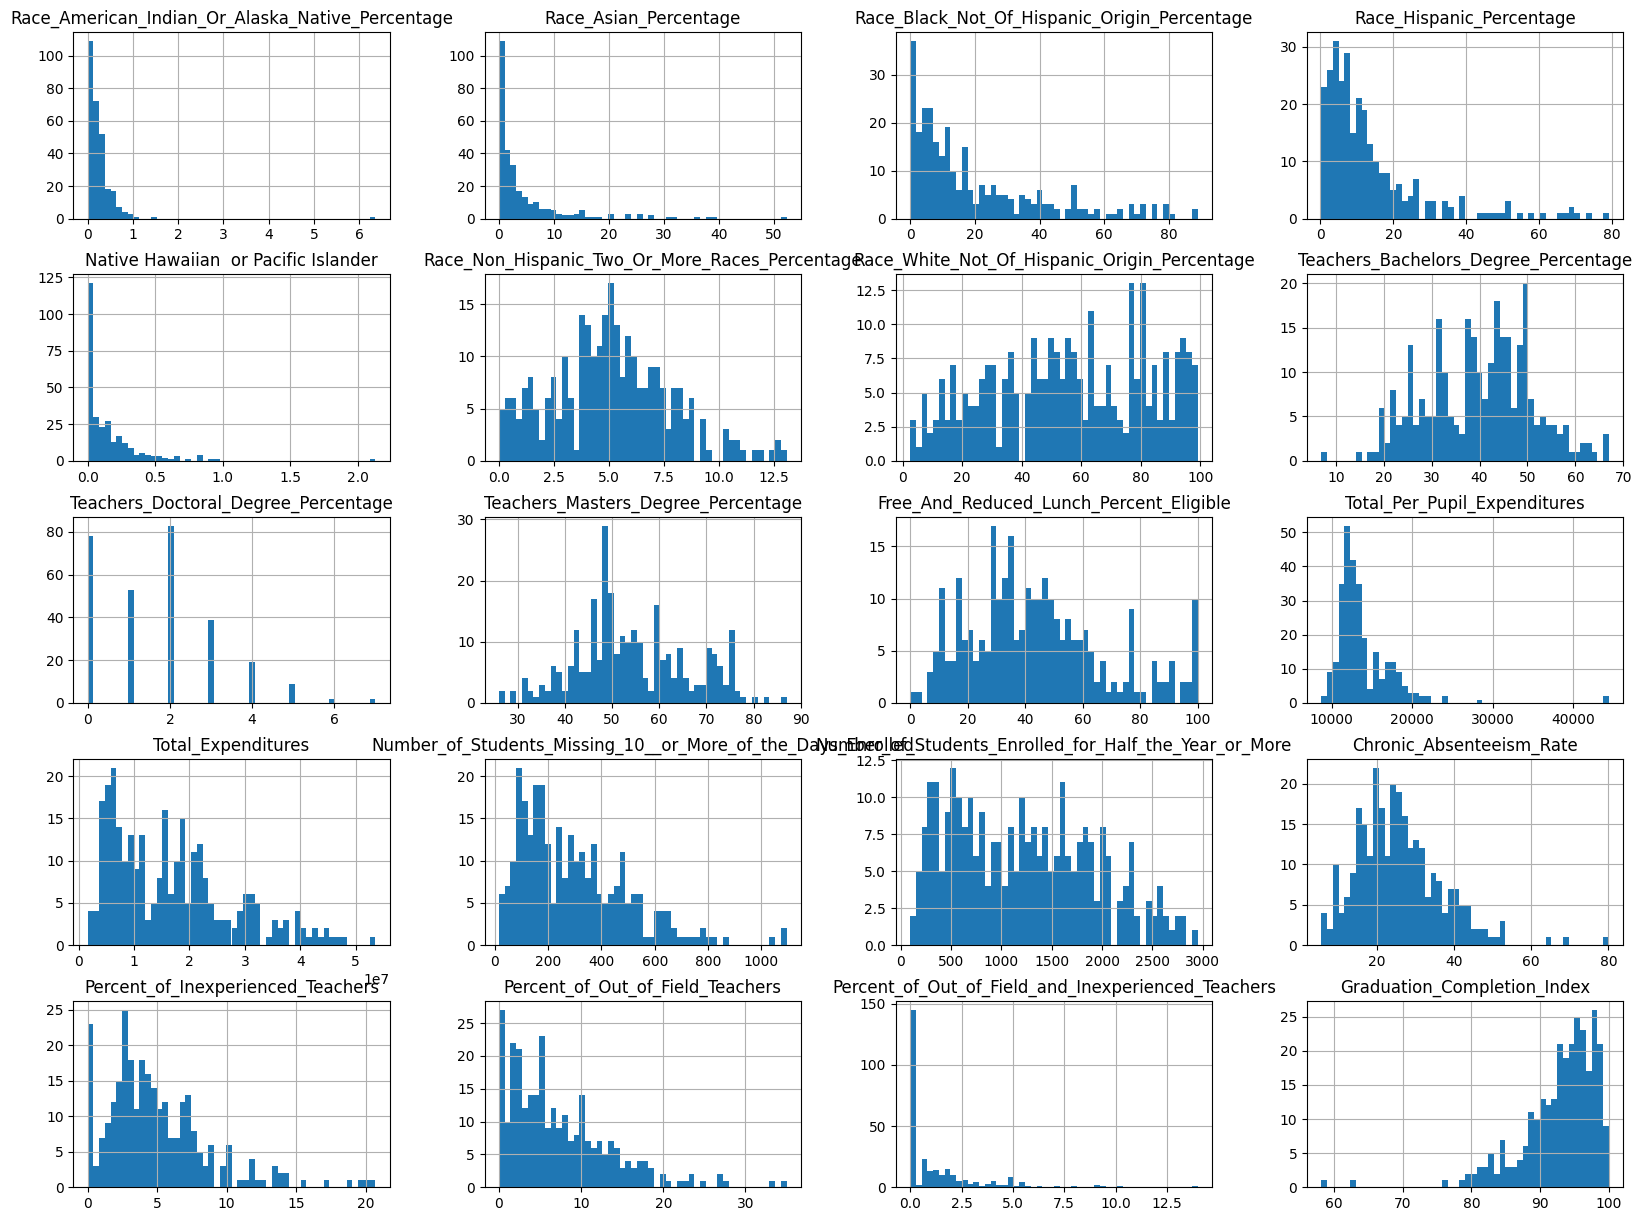

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
merged_df.hist(bins=50, figsize=(20,15))  # Get a sense of the distribution of the data
plt.show()

array([[<Axes: xlabel='Race_American_Indian_Or_Alaska_Native_Percentage', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes: xlabel='Race_Asian_Percentage', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes: xlabel='Race_Black_Not_Of_Hispanic_Origin_Percentage', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes: xlabel='Race_Hispanic_Percentage', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes: xlabel='Native Hawaiian  or Pacific Islander', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes: xlabel='Race_Non_Hispanic_Two_Or_More_Races_Percentage', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes: xlabel='Race_White_Not_Of_Hispanic_Origin_Percentage', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes: xlabel='Teachers_Bachelors_Degree_Percentage', ylabel='Race_American_Indian_Or_Alaska_Native_Percentage'>,
        <Axes

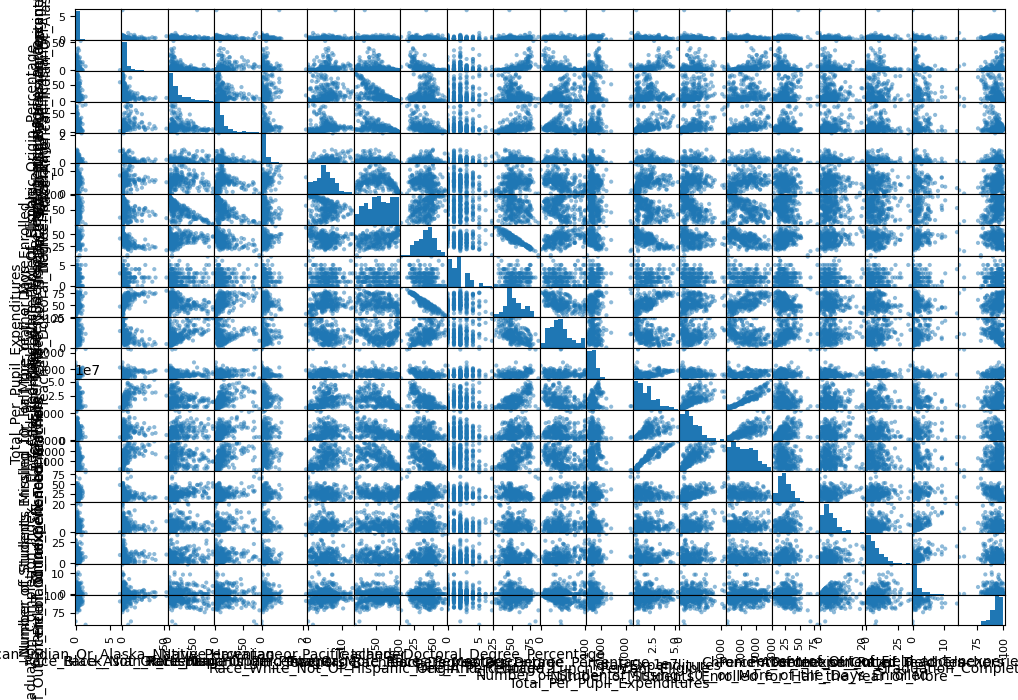

In [59]:
from pandas.plotting import scatter_matrix

scatter_matrix(merged_df, figsize=(12, 8))  # See the correlations between our features and our label

In [60]:
data = merged_df.copy()

In [61]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

# Time to split the data
data_prep = data.drop("Graduation_Completion_Index",axis=1)
data_labels = data["Graduation_Completion_Index"].copy()

# Split data
x_train, x_test, y_train, y_test = train_test_split(data_prep, data_labels, test_size=0.2, random_state=42)

# Total count was read in as strings from the csv files, so cast to numeric data type
mixed_columns = ['Economically_Disadvantaged_No_Total_Count',  'Disabled_Yes_Total_Count', 'Gender_Other_Total_Count']

for col in mixed_columns:
    x_train[col] = pd.to_numeric(x_train[col], errors='coerce')
    x_test[col] = pd.to_numeric(x_test[col], errors='coerce')

# Getting numeric and categorical attributes
num_attr = list(x_train.select_dtypes(include=[float,int]))
cat_attr = list(x_train.select_dtypes(include=['object']))

# Pipeline and Scaling
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", cat_pipeline, cat_attr),
    ])

xtrain_prep = full_pipeline.fit_transform(x_train)
xtest_prep = full_pipeline.transform(x_test)

We will be training three different types of classifiers: RandomForest, LinearRegressor, and SVR. Below we show the training steps including n-fold cross-validation. At the end, we also show their performance on the test data.

In [14]:
# Predicting Graduation Rate with Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV

rf_grid_search_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=rf_grid_search_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)

grid_search.fit(xtrain_prep, y_train)

best_params_rf_graduation = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best parameters:", best_params_rf_graduation)
print("Best Train RMSE:", best_score)

best_rf_model_graduation = RandomForestRegressor(**best_params_rf_graduation, random_state=42)

# Train model with best parameters on the entire training set
best_rf_model_graduation.fit(xtrain_prep, y_train)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Train RMSE: 4.3140271801711


RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [15]:
# Predicting Graduation Rate with Linear Regression
from sklearn.linear_model import LinearRegression

# No grid search here, just a normal linear regression
lin_reg_graduation = LinearRegression()
lin_reg_graduation.fit(xtrain_prep, y_train)

lin_reg_cv_scores = cross_val_score(lin_reg_graduation, xtrain_prep, y_train, scoring='neg_mean_squared_error', cv=5)
lin_reg_cv_rmse = np.sqrt(-lin_reg_cv_scores)
lin_reg_cv_rmse

array([4.98572322, 4.49668087, 3.88185329, 4.21470385, 4.17394084])

In [16]:
# Predicting Graduation Rate with SVR (Support Vector Regression)
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, recall_score, precision_score

svr_param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto', .01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

svr = SVR()

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=svr_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(xtrain_prep, y_train)

best_params_svr_graduation = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best parameters:", best_params_svr_graduation)
print("Best Train RMSE:", best_score)

best_svr_model_graduation = SVR(**best_params_svr_graduation)

# Train model with best parameters on the entire training set
best_svr_model_graduation.fit(xtrain_prep, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Best Train RMSE: 3.924672699596866


SVR(C=100, epsilon=0.01, gamma=0.01)

In [17]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Create the base models
rf_model_ensemble_graduation = RandomForestRegressor(**best_params_rf_graduation, random_state=42)
svm_model_ensemble_graduation = SVR(**best_params_svr_graduation)
lr_model_ensemble_graduation = LinearRegression()

# Create the ensemble model
ensemble_model_graduation = VotingRegressor(
    estimators=[
        ('rf', rf_model_ensemble_graduation),
        ('svm', svm_model_ensemble_graduation),
        ('lr', lr_model_ensemble_graduation)
    ]
)

# Fit the ensemble model
ensemble_model_graduation.fit(xtrain_prep, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=300,
                                                   random_state=42)),
                            ('svm', SVR(C=100, epsilon=0.01, gamma=0.01)),
                            ('lr', LinearRegression())])

In [18]:
# RandomForest performance

y_pred_rf = best_rf_model_graduation.predict(xtest_prep)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RandomForest performance on test set:")
print("RMSE:", rmse)

RandomForest performance on test set:
RMSE: 3.053349626963731


In [19]:
# LinearRegression performance

y_pred_linreg = lin_reg_graduation.predict(xtest_prep)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linreg))

print("Linear Regression performance on test set:")
print("RMSE:", rmse)

Linear Regression performance on test set:
RMSE: 3.11828404978734


In [20]:
# SVR performance

y_pred_svr = best_svr_model_graduation.predict(xtest_prep)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("SVR performance on test set:")
print("RMSE:", rmse)

SVR performance on test set:
RMSE: 3.0676850116576326


In [21]:
# Ensemble Model Performance
# Make predictions
y_pred = ensemble_model_graduation.predict(xtest_prep)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Ensemble Model RMSE: {rmse}")

# Compare with individual models
for name, model in ensemble_model_graduation.named_estimators_.items():
    model.fit(xtrain_prep, y_train)
    y_pred = model.predict(xtest_prep)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} RMSE: {rmse}")

Ensemble Model RMSE: 2.984952843377963
rf RMSE: 3.053349626963731
svm RMSE: 3.0676850116576326
lr RMSE: 3.11828404978734


In [22]:
# Get feature importances
importances = best_rf_model_graduation.feature_importances_

# Get column names from merged_df
feature_names = merged_df.columns.tolist()

# Sort features by importance
feature_importance = sorted(zip(importances, feature_names), reverse=True)

print("Feature ranking:")
for i, (importance, feature) in enumerate(feature_importance, 1):
    print(f"{i}. {feature}: {importance:.4f}")

Feature ranking:
1. Teachers_Bachelors_Degree_Percentage: 0.2600
2. Race_Black_Not_Of_Hispanic_Origin_Percentage: 0.2216
3. Gender_Male_Total_Count: 0.0531
4. Race_Hispanic_Percentage: 0.0455
5. Disabled_No_Total_Count: 0.0387
6. Gender_Female_Total_Count: 0.0380
7. Sch_Div: 0.0350
8. Homeless_No_Total_Count: 0.0279
9. Teachers_Doctoral_Degree_Percentage: 0.0217
10. Race_Non_Hispanic_Two_Or_More_Races_Percentage: 0.0193
11. Economically_Disadvantaged_No_Total_Count: 0.0169
12. Foster_Care_No_Total_Count: 0.0169
13. Gender_Other_Total_Count: 0.0161
14. English_Learners_No_Total_Count: 0.0160
15. Free_And_Reduced_Lunch_Percent_Eligible: 0.0159
16. Race_White_Not_Of_Hispanic_Origin_Percentage: 0.0145
17. Disabled_Yes_Total_Count: 0.0134
18. Teachers_Masters_Degree_Percentage: 0.0128
19. Race_Asian_Percentage: 0.0116
20. Native Hawaiian  or Pacific Islander: 0.0075
21. Race_American_Indian_Or_Alaska_Native_Percentage: 0.0053
22. Economically_Disadvantaged_Yes_Total_Count: 0.0021
23. Title1

In [62]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_svr_model_graduation, xtest_prep.toarray(), y_test, n_repeats=10, random_state=42)

importances = perm_importance.importances_mean

feature_importance = sorted(zip(importances, feature_names), reverse=True)

# Print feature importance
for i, (importance, feature) in enumerate(feature_importance, 1):
    print(f"{i}. {feature}: {importance:.4f}")

1. Race_Black_Not_Of_Hispanic_Origin_Percentage: 0.3024
2. Homeless_No_Total_Count: 0.1240
3. Teachers_Bachelors_Degree_Percentage: 0.1146
4. Gender_Male_Total_Count: 0.0787
5. Disabled_No_Total_Count: 0.0579
6. Race_American_Indian_Or_Alaska_Native_Percentage: 0.0436
7. Teachers_Masters_Degree_Percentage: 0.0316
8. Teachers_Doctoral_Degree_Percentage: 0.0297
9. Sch_Div: 0.0280
10. Economically_Disadvantaged_Yes_Total_Count: 0.0201
11. Disabled_Yes_Total_Count: 0.0119
12. Economically_Disadvantaged_No_Total_Count: 0.0102
13. Race_Non_Hispanic_Two_Or_More_Races_Percentage: 0.0084
14. Native Hawaiian  or Pacific Islander: 0.0052
15. Race_Asian_Percentage: 0.0025
16. Total_Per_Pupil_Expenditures: 0.0000
17. Total_Expenditures: 0.0000
18. Title1_Code: 0.0000
19. Poverty_Level: 0.0000
20. Percent_of_Out_of_Field_and_Inexperienced_Teachers: 0.0000
21. Percent_of_Out_of_Field_Teachers: 0.0000
22. Percent_of_Inexperienced_Teachers: 0.0000
23. Number_of_Students_Missing_10__or_More_of_the_Days_

# SOL (Standardized Test) Predictions

In [23]:
#VA standardized tests data being cleaned up
sol_pass_rate = solPassRateCleanup('ML4VA_Data/SOL_Pass_Rate.csv')

sol_pass_rate.rename(columns={"SOL Pass Rate": "SOL_Pass_Rate"}, inplace=True)
sol_pass_rate

,SOL_Pass_Rate,Sch_Div
1,58.2,Galax High Galax City Public Schools
4,63.0,Thomas Walker High Lee County Public Schools
8,60.8,Lee High Lee County Public Schools
14,78.0,Salem High Salem City Public Schools
22,71.8,Bath County High Bath County Public Schools
...,...,...
1678,77.2,Forest Park High Prince William County Public ...
1691,82.4,Gainesville High Prince William County Public ...
1696,80.0,Jamestown High Williamsburg-James City County ...
1704,72.8,Lafayette High Williamsburg-James City County ...


In [24]:
#Setting Up SOL Score Prediction

# Load in other datasets that did not need to be reshaped
other_files = ['Free_and_Reduced_Lunch.csv', 'Funding.csv', 'Absenteeism.csv', 'Experience.csv']
file_names = ['ML4VA_Data/' + file_name for file_name in other_files]

pivoted_dfs.append(sol_pass_rate)

# Filter other datasets for only high schools
other_dfs = [pd.read_csv(file_name) for file_name in file_names]
for i, df in enumerate(other_dfs):
  other_dfs[i] = df[df['Sch_Div'].str.contains(" High ", case=False)]

# Combine reshaped datasets with other datasets
all_dfs = pivoted_dfs + other_dfs

# Merge datasets based on School Division (Sch_Div), discard any high schools that are not present in all datasets
merged_df_sol = all_dfs[0]
for i in range(1, len(all_dfs)):
  merged_df_sol = pd.merge(merged_df_sol, all_dfs[i], on='Sch_Div', how='inner')

merged_df_sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 36 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Sch_Div                                                      285 non-null    object 
 1   Economically_Disadvantaged_No_Total_Count                    282 non-null    object 
 2   Economically_Disadvantaged_Yes_Total_Count                   285 non-null    object 
 3   English_Learners_No_Total_Count                              285 non-null    object 
 4   English_Learners_Yes_Total_Count                             186 non-null    object 
 5   Foster_Care_No_Total_Count                                   285 non-null    object 
 6   Foster_Care_Yes_Total_Count                                  226 non-null    object 
 7   Homeless_No_Total_Count                                      285 non-null    obj

In [25]:
merged_df_sol

,Sch_Div,Economically_Disadvantaged_No_Total_Count,Economically_Disadvantaged_Yes_Total_Count,English_Learners_No_Total_Count,English_Learners_Yes_Total_Count,Foster_Care_No_Total_Count,Foster_Care_Yes_Total_Count,Homeless_No_Total_Count,Homeless_Yes_Total_Count,Disabled_No_Total_Count,...,Total_Per_Pupil_Expenditures,Total_Expenditures,Number_of_Students_Missing_10__or_More_of_the_Days_Enrolled,Number_of_Students_Enrolled_for_Half_the_Year_or_More,Chronic_Absenteeism_Rate,Poverty_Level,Title1_Code,Percent_of_Inexperienced_Teachers,Percent_of_Out_of_Field_Teachers,Percent_of_Out_of_Field_and_Inexperienced_Teachers
0,Abingdon High Washington County Public Schools,534,327,852,NaN,853,8,861,NaN,711,...,11496,9445329,201,795,25.28,Medium Poverty,Non-Title I,4.2,6.3,0.0
1,Albemarle High Albemarle County Public Schools,"1,393",524,"1,703",172,"1,914",3,"1,907",10,"1,693",...,15599,29702664,372,1913,19.45,Low Poverty,Non-Title I,4.0,4.5,1.7
2,Altavista High Campbell County Public Schools,364,338,698,NaN,701,1,694,NaN,603,...,11414,7825450,171,699,24.46,Medium Poverty,Non-Title I,0.0,7.7,0.0
3,Amelia County High Amelia County Public Schools,292,201,483,NaN,491,2,493,NaN,427,...,12501,6090345,105,495,21.21,Medium Poverty,Non-Title I,6.5,2.2,2.2
4,Amherst County High Amherst County Public Schools,563,654,"1,208",NaN,"1,207",10,"1,210",NaN,"1,063",...,12735,15223809,528,1205,43.82,Medium Poverty,Non-Title I,7.3,5.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,Woodgrove High Loudoun County Public Schools,"1,380",186,"1,532",25,"1,562",4,"1,560",NaN,"1,295",...,20435,31674570,292,1525,19.15,Low Poverty,Non-Title I,0.6,3.2,0.0
281,Woodside High Newport News City Public Schools,938,805,"1,708",18,"1,742",1,"1,737",NaN,"1,527",...,13193,22533728,481,1702,28.26,High Poverty,Non-Title I,4.7,16.4,4.7
282,Woodson High Fairfax County Public Schools,"2,120",370,"2,306",118,"2,483",7,"2,484",NaN,"2,056",...,17198,42461047,634,2478,25.59,Low Poverty,Non-Title I,4.7,14.2,1.6
283,York High York County Public Schools,852,239,"1,071",13,"1,091",NaN,"1,084",NaN,970,...,9917,10645988,197,1076,18.31,Low Poverty,Non-Title I,2.0,0.0,0.0


In [26]:
# Standardized score correlations
sol_corr_matrix = merged_df_sol.corr(numeric_only=True)
sol_correlations = sol_corr_matrix["SOL_Pass_Rate"].sort_values(ascending=False)
sol_correlations

SOL_Pass_Rate                                                  1.000000
Race_White_Not_Of_Hispanic_Origin_Percentage                   0.474080
Race_Asian_Percentage                                          0.244112
Race_Non_Hispanic_Two_Or_More_Races_Percentage                 0.209691
Teachers_Masters_Degree_Percentage                             0.121374
Number_of_Students_Enrolled_for_Half_the_Year_or_More          0.078301
Total_Expenditures                                             0.051466
Native Hawaiian  or Pacific Islander                          -0.009045
Teachers_Bachelors_Degree_Percentage                          -0.016718
Percent_of_Inexperienced_Teachers                             -0.068344
Teachers_Doctoral_Degree_Percentage                           -0.140836
Race_American_Indian_Or_Alaska_Native_Percentage              -0.144072
Percent_of_Out_of_Field_and_Inexperienced_Teachers            -0.178481
Percent_of_Out_of_Field_Teachers                              -0

In [27]:
# Splitting and Data Prep/Clean/ Pipeline + Scaling FOR SOL
data = merged_df_sol.copy()
data_prep_sol = data.drop("SOL_Pass_Rate",axis=1)
data_labels_sol = data["SOL_Pass_Rate"].copy()

# Split data
x_train, x_test, y_train, y_test = train_test_split(data_prep_sol, data_labels_sol, test_size=0.2, random_state=42)

# Total count was read in as strings from the csv files, so cast to numeric data type
mixed_columns = ['Economically_Disadvantaged_No_Total_Count',  'Disabled_Yes_Total_Count', 'Gender_Other_Total_Count']

for col in mixed_columns:
    x_train[col] = pd.to_numeric(x_train[col], errors='coerce')
    x_test[col] = pd.to_numeric(x_test[col], errors='coerce')

# Getting numeric and categorical attributes
num_attr = list(x_train.select_dtypes(include=[float,int]))
cat_attr = list(x_train.select_dtypes(include=['object']))

# Pipeline and Scaling
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", cat_pipeline, cat_attr),
    ])

xtrain_prep = full_pipeline.fit_transform(x_train)
xtest_prep = full_pipeline.transform(x_test)

In [28]:
# Predicting SOL score with Random Forest

rf_grid_search_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=rf_grid_search_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Use all available cores
)

grid_search.fit(xtrain_prep, y_train)

best_params_rf_sol = grid_search.best_params_
random_forest_cv_rmse_sol = np.sqrt(-grid_search.best_score_)

print("Best parameters:", best_params_rf_sol)
print("Best RMSE:", random_forest_cv_rmse_sol)

best_rf_model_sol = RandomForestRegressor(**best_params_rf_sol, random_state=42)

# Train model with best parameters on the entire training set
best_rf_model_sol.fit(xtrain_prep, y_train)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 7.680167673945774


RandomForestRegressor(min_samples_leaf=4, random_state=42)

In [29]:
# Predicting SOL score with Linear Regression

lin_reg_sol = LinearRegression()
lin_reg_sol.fit(xtrain_prep, y_train)

lin_reg_cv_scores_sol = cross_val_score(lin_reg_sol, xtrain_prep, y_train, scoring='neg_mean_squared_error', cv=5)
lin_reg_cv_rmse_sol = np.sqrt(-lin_reg_cv_scores_sol)
lin_reg_cv_rmse_sol

print("Linear Regression RMSE on training data:", lin_reg_cv_rmse_sol)

Linear Regression RMSE on training data: [7.04230835 9.93577854 6.78100389 8.59529585 9.35485845]


In [30]:
# Predicting SOL score with SVR
svr_param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto', .01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

svr = SVR()

grid_search = GridSearchCV(
    estimator=svr,
    param_grid=svr_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(xtrain_prep, y_train)

best_params_svr_sol = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best parameters:", best_params_svr_sol)
print("Best RMSE:", best_score)

best_svr_model_sol = SVR(**best_params_svr_sol)

# Train model with best parameters on the entire training set
best_svr_model_sol.fit(xtrain_prep, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Best RMSE: 7.388639180668438


SVR(C=100, epsilon=0.01, gamma=0.01)

In [31]:
# Create the base models
rf_model_ensemble_sol = RandomForestRegressor(**best_params_rf_sol, random_state=42)
svm_model_ensemble_sol = SVR(**best_params_svr_sol)
lr_model_ensemble_sol = LinearRegression()

# Create the ensemble model
ensemble_model_sol = VotingRegressor(
    estimators=[
        ('rf', rf_model_ensemble_sol),
        ('svm', svm_model_ensemble_sol),
        ('lr', lr_model_ensemble_sol)
    ]
)

# Fit the ensemble model
ensemble_model_sol.fit(xtrain_prep, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(min_samples_leaf=4,
                                                   random_state=42)),
                            ('svm', SVR(C=100, epsilon=0.01, gamma=0.01)),
                            ('lr', LinearRegression())])

In [32]:
# RandomForest performance
y_pred_rf = best_rf_model_sol.predict(xtest_prep)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("RandomForest performance on test set:")
print("RMSE:", rmse)

RandomForest performance on test set:
RMSE: 6.6697276152917295


In [33]:
# LinearRegression performance
y_pred_linreg = lin_reg_sol.predict(xtest_prep)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linreg))

print("Linear Regression performance on test set:")
print("RMSE:", rmse)

Linear Regression performance on test set:
RMSE: 6.956657831145499


In [34]:
# SVR performance

y_pred_svr = best_svr_model_sol.predict(xtest_prep)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("SVR performance on test set:")
print("RMSE:", rmse)

SVR performance on test set:
RMSE: 6.644816560095916


In [36]:
# Ensemble Model Performance
# Make predictions
y_pred = ensemble_model_sol.predict(xtest_prep)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Ensemble Model RMSE: {rmse}")

# Compare with individual models
for name, model in ensemble_model_sol.named_estimators_.items():
    model.fit(xtrain_prep, y_train)
    y_pred = model.predict(xtest_prep)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} RMSE: {rmse}")

Ensemble Model RMSE: 6.56912587317183
rf RMSE: 6.6697276152917295
svm RMSE: 6.644816560095916
lr RMSE: 6.956657831145499


In [ ]:
# Get feature importances
importances = best_rf_model_sol.feature_importances_

# Get column names from merged_df
feature_names = merged_df.columns.tolist()

# Sort features by importance
feature_importance = sorted(zip(importances, feature_names), reverse=True)

print("Feature ranking:")
for i, (importance, feature) in enumerate(feature_importance, 1):
    print(f"{i}. {feature}: {importance:.4f}")

Feature ranking:
1. Race_Black_Not_Of_Hispanic_Origin_Percentage: 0.4040
2. Gender_Male_Total_Count: 0.2124
3. Teachers_Bachelors_Degree_Percentage: 0.0476
4. Gender_Female_Total_Count: 0.0471
5. Homeless_No_Total_Count: 0.0349
6. Race_Hispanic_Percentage: 0.0348
7. Teachers_Doctoral_Degree_Percentage: 0.0284
8. Disabled_No_Total_Count: 0.0271
9. English_Learners_No_Total_Count: 0.0255
10. Teachers_Masters_Degree_Percentage: 0.0198
11. Race_Non_Hispanic_Two_Or_More_Races_Percentage: 0.0196
12. Gender_Other_Total_Count: 0.0173
13. Foster_Care_No_Total_Count: 0.0158
14. Economically_Disadvantaged_No_Total_Count: 0.0102
15. Race_Asian_Percentage: 0.0082
16. Race_American_Indian_Or_Alaska_Native_Percentage: 0.0074
17. Disabled_Yes_Total_Count: 0.0071
18. Free_And_Reduced_Lunch_Percent_Eligible: 0.0070
19. Native Hawaiian  or Pacific Islander: 0.0069
20. Race_White_Not_Of_Hispanic_Origin_Percentage: 0.0049
21. Sch_Div: 0.0045
22. Economically_Disadvantaged_Yes_Total_Count: 0.0021
23. Total_

In [47]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_svr_model_sol, xtest_prep.toarray(), y_test, n_repeats=10, random_state=42)

importances = perm_importance.importances_mean

feature_importance = sorted(zip(importances, feature_names), reverse=True)

# Print feature importance
for i, (importance, feature) in enumerate(feature_importance, 1):
    print(f"{i}. {feature}: {importance:.4f}")

1. Race_Black_Not_Of_Hispanic_Origin_Percentage: 0.2154
2. Foster_Care_No_Total_Count: 0.0655
3. Homeless_No_Total_Count: 0.0643
4. Race_American_Indian_Or_Alaska_Native_Percentage: 0.0296
5. Teachers_Bachelors_Degree_Percentage: 0.0276
6. English_Learners_No_Total_Count: 0.0164
7. Gender_Female_Total_Count: 0.0095
8. Gender_Male_Total_Count: 0.0093
9. Race_Non_Hispanic_Two_Or_More_Races_Percentage: 0.0076
10. Disabled_Yes_Total_Count: 0.0069
11. Teachers_Doctoral_Degree_Percentage: 0.0063
12. Economically_Disadvantaged_Yes_Total_Count: 0.0047
13. Race_Asian_Percentage: 0.0046
14. Race_White_Not_Of_Hispanic_Origin_Percentage: 0.0042
15. Free_And_Reduced_Lunch_Percent_Eligible: 0.0024
16. Gender_Other_Total_Count: 0.0016
17. Sch_Div: 0.0001
18. Total_Per_Pupil_Expenditures: 0.0000
19. Total_Expenditures: 0.0000
20. Title1_Code: 0.0000
21. Poverty_Level: 0.0000
22. Percent_of_Out_of_Field_and_Inexperienced_Teachers: 0.0000
23. Percent_of_Out_of_Field_Teachers: 0.0000
24. Percent_of_Inexp

In [37]:
# # TEST DATA

# svr_reg_sol_test = SVR()
# svr_reg_sol_test.fit(xtest_prep, y_test)

# svr_reg_cv_scores_sol_test = cross_val_score(svr_reg_sol_test, xtest_prep, y_test, scoring='neg_mean_squared_error', cv=5)
# svr_reg_cv_rmse_sol_test = np.sqrt(-svr_reg_cv_scores_sol_test)
# svr_reg_cv_rmse_sol_test


In [38]:


# random_forest_reg_sol_test = RandomForestRegressor()
# random_forest_reg_sol_test.fit(xtest_prep, y_test)

# random_forest_cv_scores_sol_test = cross_val_score(random_forest_reg_sol_test, xtest_prep, y_test, scoring='neg_mean_squared_error', cv=5)
# random_forest_cv_rmse_sol_test = np.sqrt(-random_forest_cv_scores_sol_test)
# random_forest_cv_rmse_sol


In [39]:
# #TEST DATA

# lin_reg_sol_test = LinearRegression()
# lin_reg_sol_test.fit(xtest_prep, y_test)

# lin_reg_cv_scores_sol_test = cross_val_score(lin_reg_sol_test, xtest_prep, y_test, scoring='neg_mean_squared_error', cv=5)
# lin_reg_cv_rmse_sol_test = np.sqrt(-lin_reg_cv_scores_sol_test)
# lin_reg_cv_rmse_sol_test



In [40]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt

# # Create the Random Forest Regressor
# random_forest_reg = RandomForestRegressor(random_state=42)

# # Generate the learning curve data
# train_sizes, train_scores, val_scores = learning_curve(
#     random_forest_reg, xtrain_prep, y_train,
#     train_sizes=np.linspace(0.1, 1.0, 10),
#     cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# # Calculate RMSE from MSE
# train_rmse = np.sqrt(-train_scores)
# val_rmse = np.sqrt(-val_scores)

# # Calculate mean and standard deviation for train and validation scores
# train_rmse_mean = np.mean(train_rmse, axis=1)
# train_rmse_std = np.std(train_rmse, axis=1)
# val_rmse_mean = np.mean(val_rmse, axis=1)
# val_rmse_std = np.std(val_rmse, axis=1)

# # Plot the learning curve
# plt.figure(figsize=(10, 6))
# plt.title('Learning Curve for Random Forest Regressor')
# plt.xlabel('Training Set Size')
# plt.ylabel('RMSE')
# plt.grid()

# plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std,
#                  train_rmse_mean + train_rmse_std, alpha=0.1, color='blue')
# plt.fill_between(train_sizes, val_rmse_mean - val_rmse_std,
#                  val_rmse_mean + val_rmse_std, alpha=0.1, color='orange')

# plt.plot(train_sizes, train_rmse_mean, 'o-', color='blue', label='Training Score')
# plt.plot(train_sizes, val_rmse_mean, 'o-', color='orange', label='Validation Score')

# plt.legend(loc='best')
# plt.show()

# # Fit the model on the entire training set
# random_forest_reg.fit(xtrain_prep, y_train)